In [1]:
import numpy as np
from scipy.linalg import sqrtm
import qiskit.quantum_info as qi
from scipy.stats import unitary_group
from numpy.linalg import qr
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import Aer, transpile
from qiskit.circuit import Parameter, ParameterVector
import qiskit.quantum_info as qi
from qiskit import Aer
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import state_fidelity, Statevector, random_statevector
from scipy.linalg import expm
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_histogram
import itertools
from sympy import *
from qiskit.circuit.library import QFT

In [ ]:
from sympy import *
init_printing(use_unicode=True)

n=symbols("n")
a11,a12,a21,a22=symbols("a_11,a_12,a_21,a_22")
A = Matrix([[a11,a12],[a21,a22]])
simplify(Trace(A**7))

In [ ]:
def kron(qubit_list):
    result = 1
    for element in qubit_list:
        result = np.kron(result, element)
    return result

In [ ]:
n = 6
vec_list = []
for i in range(3):
    if i == 1:
        vec = np.matrix(random_state_vector(2))
    else:
        vec = np.matrix(random_state_vector(4))
    vec_list.append(vec)

K = 10
np.trace((kron(vec_list) * kron(vec_list).H)**K)

In [ ]:
GHZ = np.matrix(ghz(2,3).toarray())
GHZ = GHZ * GHZ.H

n = 4
GHZ = np.matrix(random_state_vector(2**n))
GHZ = GHZ * GHZ.H
# GHZ = np.matrix(random_density_matrix(2**n))
K = 5

In [ ]:
val,_ = np.linalg.eig(GHZ)
np.sum(val**K)

In [ ]:
np.trace(GHZ**K)

In [ ]:
len(GHZ)

In [ ]:
qi.partial_trace(GHZ,[0,1,3])

In [ ]:
np.trace(GHZ**K)

In [ ]:
np.trace(np.matrix(qi.partial_trace(GHZ,[2,3]))**K)

In [ ]:
0.567163909352

In [ ]:
n = 10

lhs_list = []
rhs_list = []

sample = 100
for i in range(sample):
    rho = np.matrix(random_density_matrix(n))
    sigma = np.matrix(random_density_matrix(n))


    p = np.random.dirichlet(np.ones(2), size=1)

    K = 8
    lhs = np.trace((np.matrix(p[0,0] * rho + p[0,1] * sigma))**K)
    rhs = p[0,0] * np.trace(np.matrix(rho)**K) + p[0,1] * np.trace(np.matrix(sigma)**K)
    lhs_list.append(lhs)
    rhs_list.append(rhs)
    

# plt.plot(np.arange(sample), lhs_list)
# plt.plot(np.arange(sample), rhs_list)
plt.plot(np.arange(sample), np.array(rhs_list)-np.array(lhs_list))

In [ ]:
data = []
for i in range(100):
    n = 4
    rho = random_density_matrix(n)
    sigma = random_density_matrix(n)
    data.append(np.trace((np.matrix(rho))**10))
    
plt.plot(data)

In [ ]:
n = 4
rho = np.matrix(random_density_matrix(n))
sigma = np.matrix(random_density_matrix(n))
N = 4
j = 3
np.trace((rho-sigma)**N)

In [ ]:
def powerset(s):
    x = len(s)
    result = []
    for i in range(1 << x):
        result.append([s[j] for j in range(x) if (i & (1 << j))])
    return result

In [ ]:
powerset([1,3,4])

In [ ]:
i = 2
s = [1,3,4]
alpha = powerset(s)[i]
list(set(s).difference(set(alpha)))

In [ ]:
def con_ent(s, K, psi):
    rho = psi * psi.H
    cs = len(s)
    ps = powerset(s)
    summ = 0
    for i in range(len(ps)):
        alpha = ps[i]
        alpha = list(set(s).difference(set(alpha)))
        if alpha == []:
            summ = summ + 1
        else:
            summ = summ + np.trace(np.matrix(qi.partial_trace(rho,alpha))**K)
    result = 1 - 1 / 2**cs * summ
    return result

In [ ]:
GHZ = np.matrix(ghz(2,3).toarray())
GHZ = GHZ * GHZ.H
GHZ

In [ ]:
W = np.matrix(w_state(3))
W = W * W.H
W

In [ ]:
num_partite = np.arange(7) + 2
K = 2

data_GHZ = []
for n in num_partite:
    psi = np.matrix(ghz(2,n).toarray())
    s = [n-1]
    data_GHZ.append(con_ent(s, K, psi))

data_W = []
for n in num_partite:
    psi = np.matrix(w_state(n))
    s = [n-1]
    data_W.append(con_ent(s, K, psi))    

plt.plot(data_GHZ)
plt.plot(data_W)
plt.plot(np.array(data_GHZ) - np.array(data_W))

In [ ]:
np.matrix(random_state_vector(2**n))

In [ ]:
samples = 100
K = 5
n = 7
s = [1,3,4,5]
s_ = [2,4,6]

data_s = []
data_s_ = []
data = []
for i in range(samples):
    psi = np.matrix(np.matrix(random_state_vector(2**n)))
    i1 = con_ent(s, K, psi)
    i2 = con_ent(s_, K, psi)
    data_s.append(i1)
    data_s_.append(i2)
    data.append(i1 - i2)

plt.plot(data_s)
plt.plot(data_s_)
plt.plot(data)


In [ ]:
samples = 100
K = 10
n = 6
s = [1,3,4,5]
s_ = [0,5]

data_s = []
data_s_ = []
data_union = []
data_plus = []
for i in range(samples):
    psi = np.matrix(np.matrix(random_state_vector(2**n)))
    i1 = con_ent(s, K, psi)
    i2 = con_ent(s_, K, psi)
    i3 = con_ent(list(set(s).union(set(s_))), K, psi)
    data_s.append(i1)
    data_s_.append(i2)
    data_union.append(i3)
    data_plus.append((i1 + i2) - i3)

plt.plot(data_s)
plt.plot(data_s_)
plt.plot(data_union)
plt.plot(data_plus)

In [ ]:
n = 5
rho = np.matrix(random_density_matrix(2**n))
sig = np.matrix(random_density_matrix(2**n))
K = 10
lhs = np.absolute(np.trace(sig**K-rho**K))

summ = 0
for i in range(K):
    summ = summ + sig**i * rho**(K-1-i)
rhs = np.absolute(np.trace((sig-rho)*summ))
print(rhs)

In [ ]:
summ = 0
for i in range(K):
    summ = summ + np.trace((sig-rho) * sig**i * rho**(K-1-i))
rhs = np.absolute(summ)
print(rhs)

In [ ]:
def haar(n):
    # n=4
    u1 = unitary_group.rvs(n)
    u2 = unitary_group.rvs(n)
    Z = u1 + 1j * u2
    Q, R = qr(Z)
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(n)])
    return np.dot(Q, Lambda)

In [ ]:
a = haar(4)
a

In [61]:
import numpy as np
from toqito.random import random_density_matrix
from toqito.random import random_state_vector
from scipy.linalg import sqrtm
from toqito.states import ghz
from toqito.channels import partial_trace
import qiskit.quantum_info as qi
from toqito.states import w_state
from scipy.stats import unitary_group
from numpy.linalg import qr
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import Aer, transpile
from qiskit.circuit import Parameter, ParameterVector
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import state_fidelity, Statevector, random_statevector
from scipy.linalg import expm
from qiskit.visualization import plot_histogram
import itertools

## Circuit

In [2]:
"""
correct concentratable entanglement 
s: indices
K: \rho power
psi: input state
"""

def con_ent(s, K, psi):
    rho = psi.H * psi
    cs = len(s)
    ps = powerset(s)
    summ = 0
    for i in range(len(ps)):
        
        alpha = ps[i]
        alpha = list(set(s).difference(set(alpha)))
        if alpha == []:
            summ = summ + 1
        else:
            summ = summ + np.trace(np.matrix(qi.partial_trace(rho,alpha))**K)
    result = 1 - 1 / 2**cs * summ
    return result

In [3]:
"""
powerset: find the powerset of s
"""

def powerset(s):
    x = len(s)
    result = []
    for i in range(1 << x):
        result.append([s[j] for j in range(x) if (i & (1 << j))])
    return result

In [121]:
n = 3 # num of qubits in |psi>
psi = random_statevector(2**n) # generate random |psi>

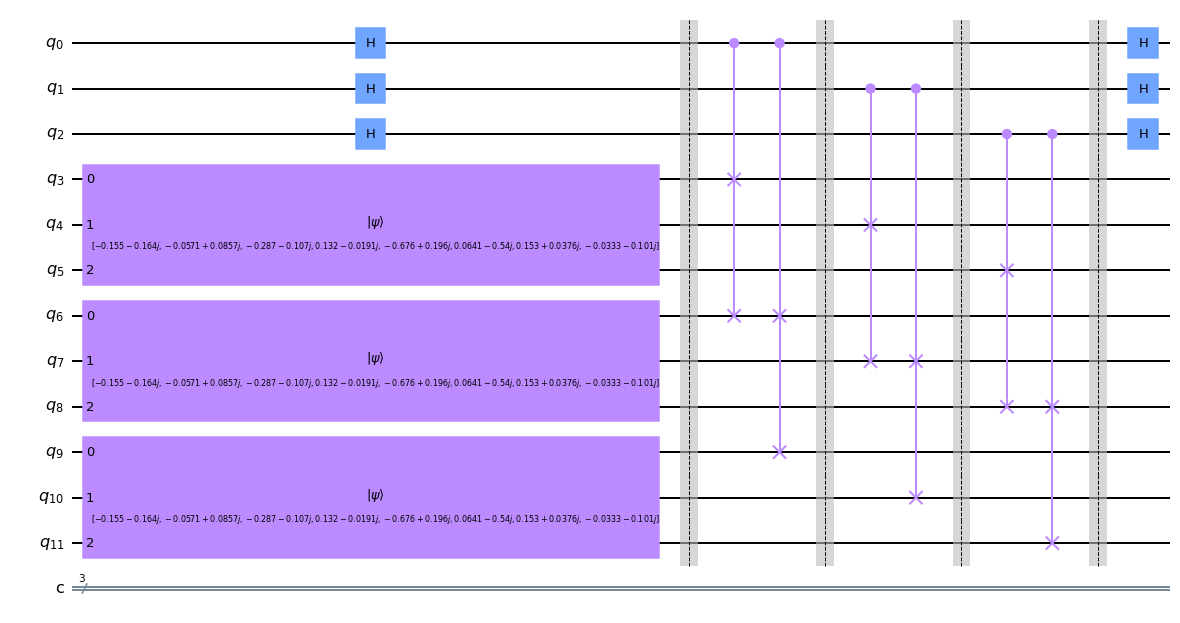

In [122]:
K = 3 # num of copies

# Construct the circuit
qc_K = QuantumCircuit((K+1) * n, n)

for i in range(n):
    qc_K.h(i)
    
for i in range(K):
    qc_K.initialize(psi, [np.arange(n) + (i+1)*n])
    
qc_K.barrier()

for parallel in range(n):
    for p in range(K-1):
        qc_K.cswap(parallel, parallel + n + p * n, parallel + n + (p+1) * n)
    qc_K.barrier()

for i in range(n):
    qc_K.h(i)

qc_K.draw('mpl')

In [124]:
# define simulator
simulator = Aer.get_backend('statevector_simulator')
outputstate = simulator.run(qc_K, shots = 1).result().get_statevector()
probs = Statevector(outputstate).probabilities([k for k in range(n)])
# probs = np.round(probs, 10)

str_list = []
for i in range(2**n):
    a = '{:0' + str(n) + 'b}'
    str_list.append(a.format(i))
print('string = ', str_list)
print('probs = ', probs)
print(dict(zip(str_list, probs)))

s_all = list(range(n))
ps = powerset(s_all)
ps.remove([])


for s in ps:
    summ = 0
    for i in range(len(str_list)):
        string_ele = str_list[i][::-1]
        s_index = [string_ele[_] for _ in s]
        s_index = ''.join(s_index)
        
        """
        Original Pattern (all 0 on s)
        """
        
        # if s_index == '0' * len(s):
        #     summ = summ + probs[i]
        
        """
        Weird Pattern
        """
        
        if len(s) == 1:
            if s_index == '0' * len(s):
                summ = summ + probs[i]
            else:
                pass          
        elif len(s) >= 2:
            if s_index == '0' * len(s) and string_ele.count('1') % 2 == 0:
                summ = summ + probs[i]
            elif string_ele.count('1') % 2 == 1:
                summ = summ + (-1) ** (((string_ele.count('1') - 1) / 2 ) % 2) * probs[i] / 2 

    ent_test_K = 1-summ
    # print('test = ', ent_test_K)
    ent_real_K = con_ent(s, K, np.matrix(psi))
    # print('real = ', ent_real_K)
    diff_K = np.real(ent_test_K - ent_real_K)
    print('s =', s, 'test = ', ent_test_K, 'real = ', ent_real_K, 'diff = ', diff_K)

string =  ['000', '001', '010', '011', '100', '101', '110', '111']
probs =  [0.71949584 0.02353564 0.03863192 0.02804628 0.04449567 0.04563755
 0.09092638 0.00923072]
{'000': 0.7194958436198007, '001': 0.023535639586169544, '010': 0.038631916705839785, '011': 0.028046277915796298, '100': 0.044495673396883484, '101': 0.045637547988927406, '110': 0.0909263793479382, '111': 0.009230721438645147}
s = [0] test =  0.10645018692953778 real =  (0.10645018692953823+1.4094628242311558e-17j) diff =  -4.440892098500626e-16
s = [1] test =  0.16683529540821895 real =  (0.16683529540821906+2.0599841277224584e-17j) diff =  -1.1102230246251565e-16
s = [0, 1] test =  0.2317879022550755 real =  (0.23178790225507562+2.3635607360183997e-17j) diff =  -1.1102230246251565e-16
s = [2] test =  0.19029032217239372 real =  (0.19029032217239383+1.452830911130576e-17j) diff =  -1.1102230246251565e-16
s = [0, 2] test =  0.2317879022550755 real =  (0.2317879022550755+2.0057740190981832e-17j) diff =  0.0
s = [1, 2] te